In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./solar_batch_results.csv', index_col=0)

In [4]:
df.head()

,datasize,encoder,trial,iou,max_f1
0,64,supervised,t1,0.172617,0.298067
1,64,supervised,t2,0.121763,0.217292
2,64,supervised,t3,0.219780,0.360443
3,64,swav-imagenet,t1,0.384871,0.556853
4,64,swav-imagenet,t2,0.344103,0.516569


In [20]:
df_pivot = pd.pivot_table(df, values = 'iou', index='datasize', columns='encoder', aggfunc=('mean', 'std'))

In [25]:
df_pivot

mean                                std                        
encoder  supervised swav-imagenet   swav-s3 supervised swav-imagenet   swav-s3
datasize                                                                      
64         0.171387      0.383006  0.250330   0.049020      0.038004  0.183313
128        0.394169      0.487972  0.439616   0.092368      0.041566  0.040758
256        0.550868      0.574077  0.607227   0.021109      0.030099  0.030055
512        0.584953      0.677261  0.646850   0.022368      0.005915  0.015027
1024       0.641417      0.692217  0.713648   0.012642      0.002192  0.035583

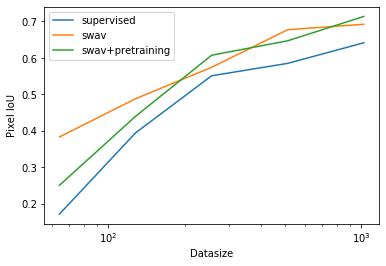

In [6]:
plt.plot(df_pivot.index, df_pivot['supervised'], label='supervised')
plt.plot(df_pivot.index, df_pivot['swav-imagenet'], label='swav')
plt.plot(df_pivot.index, df_pivot['swav-s3'], label='swav+pretraining')
plt.xscale('log')
plt.xlabel("Datasize")
plt.ylabel("Pixel IoU")
plt.legend()

In [11]:
df2 = pd.read_csv('./solar_swav-s4_batch_results.csv', index_col=0)

In [13]:
df2_pivot = pd.pivot_table(df2, values = 'iou', index='datasize', columns='encoder')

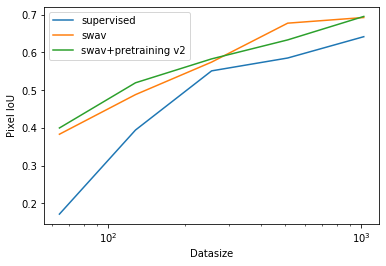

In [15]:
plt.plot(df_pivot.index, df_pivot['supervised'], label='supervised')
plt.plot(df_pivot.index, df_pivot['swav-imagenet'], label='swav')
# plt.plot(df_pivot.index, df_pivot['swav-s3'], label='swav+pretraining')
plt.plot(df2_pivot.index, df2_pivot['swav-s4'], label='swav+pretraining v2')
plt.xscale('log')
plt.xlabel("Datasize")
plt.ylabel("Pixel IoU")
plt.legend()

In [17]:
df2_pivot = pd.pivot_table(df2, values = 'iou', index='datasize', columns='encoder', aggfunc=('mean', 'std'))

In [18]:
df2_pivot

,mean,std
encoder,swav-s4,swav-s4
datasize,,
64,0.399581,0.088210
128,0.519314,0.010297
256,0.582609,0.009987
512,0.632939,0.007460
1024,0.695052,0.005399


In [19]:
df2_pivot.columns

MultiIndex([('mean', 'swav-s4'),
            ( 'std', 'swav-s4')],
           names=[None, 'encoder'])

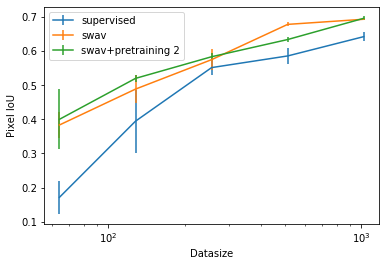

In [27]:
plt.errorbar(df_pivot.index, df_pivot[('mean','supervised')], yerr=df_pivot[('std', 'supervised')], label='supervised')
plt.errorbar(df_pivot.index, df_pivot[('mean','swav-imagenet')], yerr=df_pivot[('std', 'swav-imagenet')], label='swav')
plt.errorbar(df2_pivot.index, df2_pivot[('mean','swav-s4')], yerr=df2_pivot[('std', 'swav-s4')], label='swav+pretraining 2')
# plt.errorbar(df_pivot.index, df_pivot['swav-imagenet'], label='swav')
# # plt.plot(df_pivot.index, df_pivot['swav-s3'], label='swav+pretraining')
# plt.errorbar(df2_pivot.index, df2_pivot['swav-s4'], label='swav+pretraining v2')
plt.xscale('log')
plt.xlabel("Datasize")
plt.ylabel("Pixel IoU")
plt.legend()